# Climate Data

This notebook contain code for obtain climate data. These include:

* [x] Plot your coordinates on world map.
* [x] Get [Koeppen Climate](http://hanschen.org/koppen) identifire for coordinate (more about it [here](https://en.wikipedia.org/wiki/K%C3%B6ppen_climate_classification)):

```
climate_shifr = {
    'Af': 0,  # Tropical rainforest climate
    'Am': 1,  # Tropical monsoon climate
    'As': 2,  # Tropical dry savanna climate
    'Aw': 3,  # Tropical savanna, wet
    'BSh': 4,  # Hot semi-arid (steppe) climate
    'BSk': 5,  # Cold semi-arid (steppe) climate
    'BWh': 6,  # Hot deserts climate
    'BWk': 7,  # Cold desert climate
    'Cfa': 8,  # Humid subtropical climate
    'Cfb': 9,  # Temperate oceanic climate
    'Cfc': 10,  # Subpolar oceanic climate
    'Csa': 11,  # Hot-summer Mediterranean climate
    'Csb': 12,  # Warm-summer Mediterranean climate
    'Csc': 13,  # Cool-summer Mediterranean climate
    'Cwa': 14,  # Monsoon-influenced humid subtropical climate
    'Cwb': 15,  # Subtropical highland climate or temperate oceanic climate with dry winters
    'Cwc': 16,  # Cold subtropical highland climate or subpolar oceanic climate with dry winters	Temperate	Dry winter	Cold summer
    'Dfa': 17,  # Hot-summer humid continental climate
    'Dfb': 18,  # Warm-summer humid continental climate
    'Dfc': 19,  # Subarctic climate	Cold (continental)
    'Dfd': 20,  # Extremely cold subarctic climate
    'Dsa': 21,  # Hot, dry-summer continental climate
    'Dsb': 22,  # Warm, dry-summer continental climate
    'Dsc': 23,  # Dry-summer subarctic climate
    'Dwa': 24,  # Monsoon-influenced hot-summer humid continental climate
    'Dwb': 25,  # Monsoon-influenced warm-summer humid continental climate
    'Dwc': 26,  # Monsoon-influenced subarctic climate
    'Dwd': 27,  # Monsoon-influenced extremely cold subarctic climate
    'EF': 28,  # Ice cap climate
    'ET': 29,  # Tundra
    'None': -99
}
```

* [x] Get nearest CO2 data for nearest tower to your coordinate (based on [Ameriflux station data, 2005-2021](https://ameriflux.lbl.gov/about/about-ameriflux/), 
 [WDCGG](https://gaw.kishou.go.jp/), [Euroflux](http://www.europe-fluxdata.eu/home/), [ACT-America: L2 In Situ Atmospheric CO2, CO, CH4, and O3 Concentrations, Eastern USA](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1556), [ACT-America: L2 In Situ CO2, CO, and CH4 Concentrations from Towers, Eastern USA](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1568), [NACP: Urban Greenhouse Gases across the CO2 Urban Synthesis and Analysis Network 2000-2019](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1743)).
  *    'LOCATION_LAT' - decimal deg ref WGS84,
  *    'LOCATION_LONG' - decimal deg ref WGS84,
  *    'LOCATION_ELEV' - Elevation of the site above sea level (m),
  *    'UTC_OFFSET',
  *    'COUNTRY',
  * TIMESTAMP_START - ISO timestamp start of averaging period (up to a 12-digit integer as specified by the data's temporal resolution) YYYYMMDDHHMM
  * TIMESTAMP_END - the same
  * CO2 - Carbon Dioxide (CO2) mole fraction in wet air (CO2 mole phraction umolCO2 / mol, ppm)
  * CO2_MIXING_RATIO - Carbon Dioxide (CO2) in mole fraction of dry air (ppm)
  * H2O - Water (H2O) vapor in mole fraction of wet air (mmolH2O mol-1, ppt?)
  * PA - Atmospheric pressure (kPa)
  * RH - Relative humidity, range 0-100
  * TA - Air temperatire (deg C)
  * NETRAD - Net radiation (W m-2)
  * WD - Wind direction (Decimal degrees)
  * WS - 	Wind speed (m s-1)
* [x] Make time-series prediction for CO2 to your coordinates, base on climate, temperature, wind and nearest CO2 tower data.

All data distribution is shown below.

## Create instrastructure

1. cd to project folder
2. /opt/pyenv/versions/3.9.10/bin/python -m venv present_climate_data_venv
3. sourse present_climate_data_venv/bin/activate
3. pip install voila 
4. pip install jupyter
5. ipython kernel install --name "present_climate_data_venv" --user
6. pip install pandas numpy geopandas matplotlib ipywidgets

In [4]:
import os
import pandas as pd
import numpy as np
import math
import geopandas as gpd
import ipywidgets as widgets
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
# Main variables
koppen = pd.read_csv("/opt/process_data/CO2_data/Koeppen_climate/data/koppen_1901-2010.tsv", sep = '\t')

In [6]:
# Other variables
climate_shifr = {
    'Af': 0,  # Tropical rainforest climate
    'Am': 1,  # Tropical monsoon climate
    'As': 2,  # Tropical dry savanna climate
    'Aw': 3,  # Tropical savanna, wet
    'BSh': 4,  # Hot semi-arid (steppe) climate
    'BSk': 5,  # Cold semi-arid (steppe) climate
    'BWh': 6,  # Hot deserts climate
    'BWk': 7,  # Cold desert climate
    'Cfa': 8,  # Humid subtropical climate
    'Cfb': 9,  # Temperate oceanic climate
    'Cfc': 10,  # Subpolar oceanic climate
    'Csa': 11,  # Hot-summer Mediterranean climate
    'Csb': 12,  # Warm-summer Mediterranean climate
    'Csc': 13,  # Cool-summer Mediterranean climate
    'Cwa': 14,  # Monsoon-influenced humid subtropical climate
    'Cwb': 15,  # Subtropical highland climate or temperate oceanic climate with dry winters
    'Cwc': 16,  # Cold subtropical highland climate or subpolar oceanic climate with dry winters	Temperate	Dry winter	Cold summer
    'Dfa': 17,  # Hot-summer humid continental climate
    'Dfb': 18,  # Warm-summer humid continental climate
    'Dfc': 19,  # Subarctic climate	Cold (continental)
    'Dfd': 20,  # Extremely cold subarctic climate
    'Dsa': 21,  # Hot, dry-summer continental climate
    'Dsb': 22,  # Warm, dry-summer continental climate
    'Dsc': 23,  # Dry-summer subarctic climate
    'Dwa': 24,  # Monsoon-influenced hot-summer humid continental climate
    'Dwb': 25,  # Monsoon-influenced warm-summer humid continental climate
    'Dwc': 26,  # Monsoon-influenced subarctic climate
    'Dwd': 27,  # Monsoon-influenced extremely cold subarctic climate
    'EF': 28,  # Ice cap climate
    'ET': 29,  # Tundra
    'None': -99
}

climate_shifr_h = {
    'Af': 'Tropical rainforest climate',
    'Am': 'Tropical monsoon climate',
    'As': 'Tropical dry savanna climate',
    'Aw': 'Tropical savanna, wet',
    'BSh': 'Hot semi-arid (steppe) climate',
    'BSk': 'Cold semi-arid (steppe) climate',
    'BWh': 'Hot deserts climate',
    'BWk': 'Cold desert climate',
    'Cfa': 'Humid subtropical climate',
    'Cfb': 'Temperate oceanic climate',
    'Cfc': 'Subpolar oceanic climate',
    'Csa': 'Hot-summer Mediterranean climate',
    'Csb': 'Warm-summer Mediterranean climate',
    'Csc': 'Cool-summer Mediterranean climate',
    'Cwa': 'Monsoon-influenced humid subtropical climate',
    'Cwb': 'Subtropical highland climate or temperate oceanic climate with dry winters',
    'Cwc': 'Cold subtropical highland climate or subpolar oceanic climate with dry winters',
    'Dfa': 'Hot-summer humid continental climate',
    'Dfb': 'Warm-summer humid continental climate',
    'Dfc': 'Subarctic climate	Cold (continental)',
    'Dfd': 'Extremely cold subarctic climate',
    'Dsa': 'Hot, dry-summer continental climate',
    'Dsb': 'Warm, dry-summer continental climate',
    'Dsc': 'Dry-summer subarctic climate',
    'Dwa': 'Monsoon-influenced hot-summer humid continental climate',
    'Dwb': 'Monsoon-influenced warm-summer humid continental climate',
    'Dwc': 'Monsoon-influenced subarctic climate',
    'Dwd': 'Monsoon-influenced extremely cold subarctic climate',
    'EF': 'Ice cap climate',
    'ET': 'Tundra',
    'None': 'Not define'
}


data_types = {
    'SITE_ID': 'object',
    'TIMESTAMP_START': 'object',
    'TIMESTAMP_END': 'object',
    'CO2': 'float16',
    'H2O': 'float16',
    'PA': 'float16',
    'RH': 'float16',
    'TA': 'float16',
    'NETRAD': 'float16',
    'WD': 'float16',
    'WS': 'float16',
    'LOCATION_LAT': 'float16',
    'LOCATION_LONG': 'float16',
    'LOCATION_ELEV': 'float16',
    'UTC_OFFSET': 'int8',
    'COUNTRY': 'object',
    'CLIMATE_KOEPPEN': 'int8'
}

In [7]:
# Functions    
def myround(x, base=5, decim_size=1000):
    """Return rounded value
    :param x: float, value to round
    :param base: int, value to which is rounded
    :param decim_size: int, value of minimal decimal to round
    :return: float, rounded value to base

    Rounded flot number to decimal on set base
    """
    return base * round(x * decim_size / base) / decim_size


def clim_koppen_calc(lat, lon, koppen):
    """
    Calculate Koppen climate group
    http://hanschen.org/koppen
    https://en.wikipedia.org/wiki/K%C3%B6ppen_climate_classification
    """
    lat = myround(float(lat))
    lon = myround(float(lon))
    mask_lon = (koppen['longitude'] - lon).apply(np.abs) < 0.5
    mask_lat = (koppen['latitude'] - lat).apply(np.abs) < 0.5
    koppen_val = koppen.loc[mask_lon & mask_lat, 'p1901_2010']
    if koppen_val.empty:
        return 'None'
    else:
        return koppen_val.values[0]
#     print("The Koppen type at {} latitude and {} longitude is {}".format(
#             lat, lon, koppen_val))


def calc_unic_stations(df):
    """
    Return Dataframe with unic station ID, LONG, LAT and part based on LAT_LONG
    """
    all_df = []
    lat_long = df['LOCATION_LAT'].apply(str) + '_' + df['LOCATION_LONG'].apply(str)
    df['LAT_LONG'] = lat_long
    for coordinate in set(lat_long):
        coordinates = coordinate.split('_')
        select_df = df.loc[df['LAT_LONG'] == coordinate, ['SITE_ID', 'TIMESTAMP_START']]
        sourse = select_df['SITE_ID']
        date = select_df['TIMESTAMP_START']
        part = round(sourse.shape[0] / df.shape[0] * 100, 2)
        sourse = sourse.iloc[0]
        #TODO: may be two or more sourses
        all_df.append(
            pd.DataFrame.from_dict({
                'SITE_ID_sourse': [sourse.split('_')[0]],
                'LOCATION_LONG': [coordinates[1]], 
                'LOCATION_LAT': [coordinates[0]],
                'Date_min': [date.min().strftime('%Y-%m-%d')],
                'Date_max': [date.max().strftime('%Y-%m-%d')],
                'part': [part]
            })
        )
    return pd.concat(all_df, ignore_index=True)
    
    
def check_df_stats(df):
    """
    Check some statistics for df
    """
    print('Total shape of data: ', df.shape)
    try:
        print('Total unic stations: ', len(df['SITE_ID'].value_counts().keys()))
    except KeyError:
        pass
    print()
    print('Calculate NaN values: ')
    for col in df.columns:
        count = df[col].isnull().sum()
        print('\t{}: {} or {} %'.format(col, count, round(count/df.shape[0]*100, 2)))
        
        
def load_df(data_folder, name, data_types, index_col=0):
    """
    Load df with set data_types
    """
    filename = os.path.join(data_folder, name)
    print('Data filename: ', filename)
    return pd.read_csv(
        filename, 
        index_col=index_col, 
        dtype=data_types, 
        infer_datetime_format = True,
        memory_map = True
    )

In [8]:
sensors_df = None
sensors_df = load_df(
    '/ExternalData/4TDataHDD3/data_lab/data_science/present_my_code/climate_data/', 
    'all_co2_dm_cop_lc.csv', 
    {
        'Site_ID': 'object',
        'TIMESTAMP_START': 'object',
        'LOCATION_LAT': 'float16',
        'LOCATION_LONG': 'float16',
        'CO2': 'float16',
        'PA': 'float16',
        'RH': 'float16',
        'TA': 'float16',
        'WD': 'float16',
        'WS': 'float16',
        'CLIMATE_KOEPPEN': 'int8',
        'Mean evaporation rate': 'float16',
        '10 metre U wind component': 'float16',
        '10 metre V wind component': 'float16',
        '2 metre dewpoint temperature': 'float16',
        '2 metre temperature': 'float16',
        'Skin temperature': 'float16',
        'Soil type': 'float16',
        'cop RH': 'float16',
        'LC': 'float16'        
    }, 
    index_col=0
)

sensors_df.rename(columns = {'Site_ID':'SITE_ID'}, inplace = True)

check_df_stats(sensors_df)

Data filename:  /ExternalData/4TDataHDD3/data_lab/data_science/present_my_code/climate_data/all_co2_dm_cop_lc.csv
Total shape of data:  (1184233, 20)
Total unic stations:  474

Calculate NaN values: 
	SITE_ID: 0 or 0.0 %
	TIMESTAMP_START: 0 or 0.0 %
	LOCATION_LAT: 0 or 0.0 %
	LOCATION_LONG: 0 or 0.0 %
	CO2: 32 or 0.0 %
	PA: 621635 or 52.49 %
	RH: 646246 or 54.57 %
	TA: 668945 or 56.49 %
	WD: 583834 or 49.3 %
	WS: 576068 or 48.64 %
	CLIMATE_KOEPPEN: 0 or 0.0 %
	Mean evaporation rate: 174774 or 14.76 %
	10 metre U wind component: 174774 or 14.76 %
	10 metre V wind component: 174774 or 14.76 %
	2 metre dewpoint temperature: 174774 or 14.76 %
	2 metre temperature: 174774 or 14.76 %
	Skin temperature: 174774 or 14.76 %
	Soil type: 174774 or 14.76 %
	cop RH: 174774 or 14.76 %
	LC: 174774 or 14.76 %


In [9]:
sensors_df['TIMESTAMP_START'] = pd.to_datetime(
    sensors_df['TIMESTAMP_START']
)
sensors_df.head()

,SITE_ID,TIMESTAMP_START,LOCATION_LAT,LOCATION_LONG,CO2,PA,RH,TA,WD,WS,CLIMATE_KOEPPEN,Mean evaporation rate,10 metre U wind component,10 metre V wind component,2 metre dewpoint temperature,2 metre temperature,Skin temperature,Soil type,cop RH,LC
0,ACTAMERICA_Ground-Crawfordsville,2017-12-12,40.0,-86.75,417.50,NaN,NaN,NaN,NaN,NaN,17,-0.000008,4.285156,-3.611328,267.00,273.50,273.00,2.445312,71.4375,11.0
1,ACTAMERICA_Ground-Crawfordsville,2017-12-13,40.0,-86.75,416.25,NaN,NaN,NaN,NaN,NaN,17,-0.000007,2.091797,2.728516,261.00,269.75,269.50,2.445312,62.6250,11.0
2,ACTAMERICA_Ground-Crawfordsville,2017-12-14,40.0,-86.75,416.25,NaN,NaN,NaN,NaN,NaN,17,-0.000005,2.890625,-2.597656,267.25,272.75,273.00,2.445312,75.1875,11.0
3,ACTAMERICA_Ground-Crawfordsville,2017-12-15,40.0,-86.75,416.50,NaN,NaN,NaN,NaN,NaN,17,-0.000003,2.603516,0.687988,265.00,270.50,270.75,2.445312,74.8750,11.0
4,ACTAMERICA_Ground-Crawfordsville,2017-12-16,40.0,-86.75,417.50,NaN,NaN,NaN,NaN,NaN,17,-0.000007,2.992188,3.841797,268.50,275.50,274.50,2.445312,69.9375,11.0


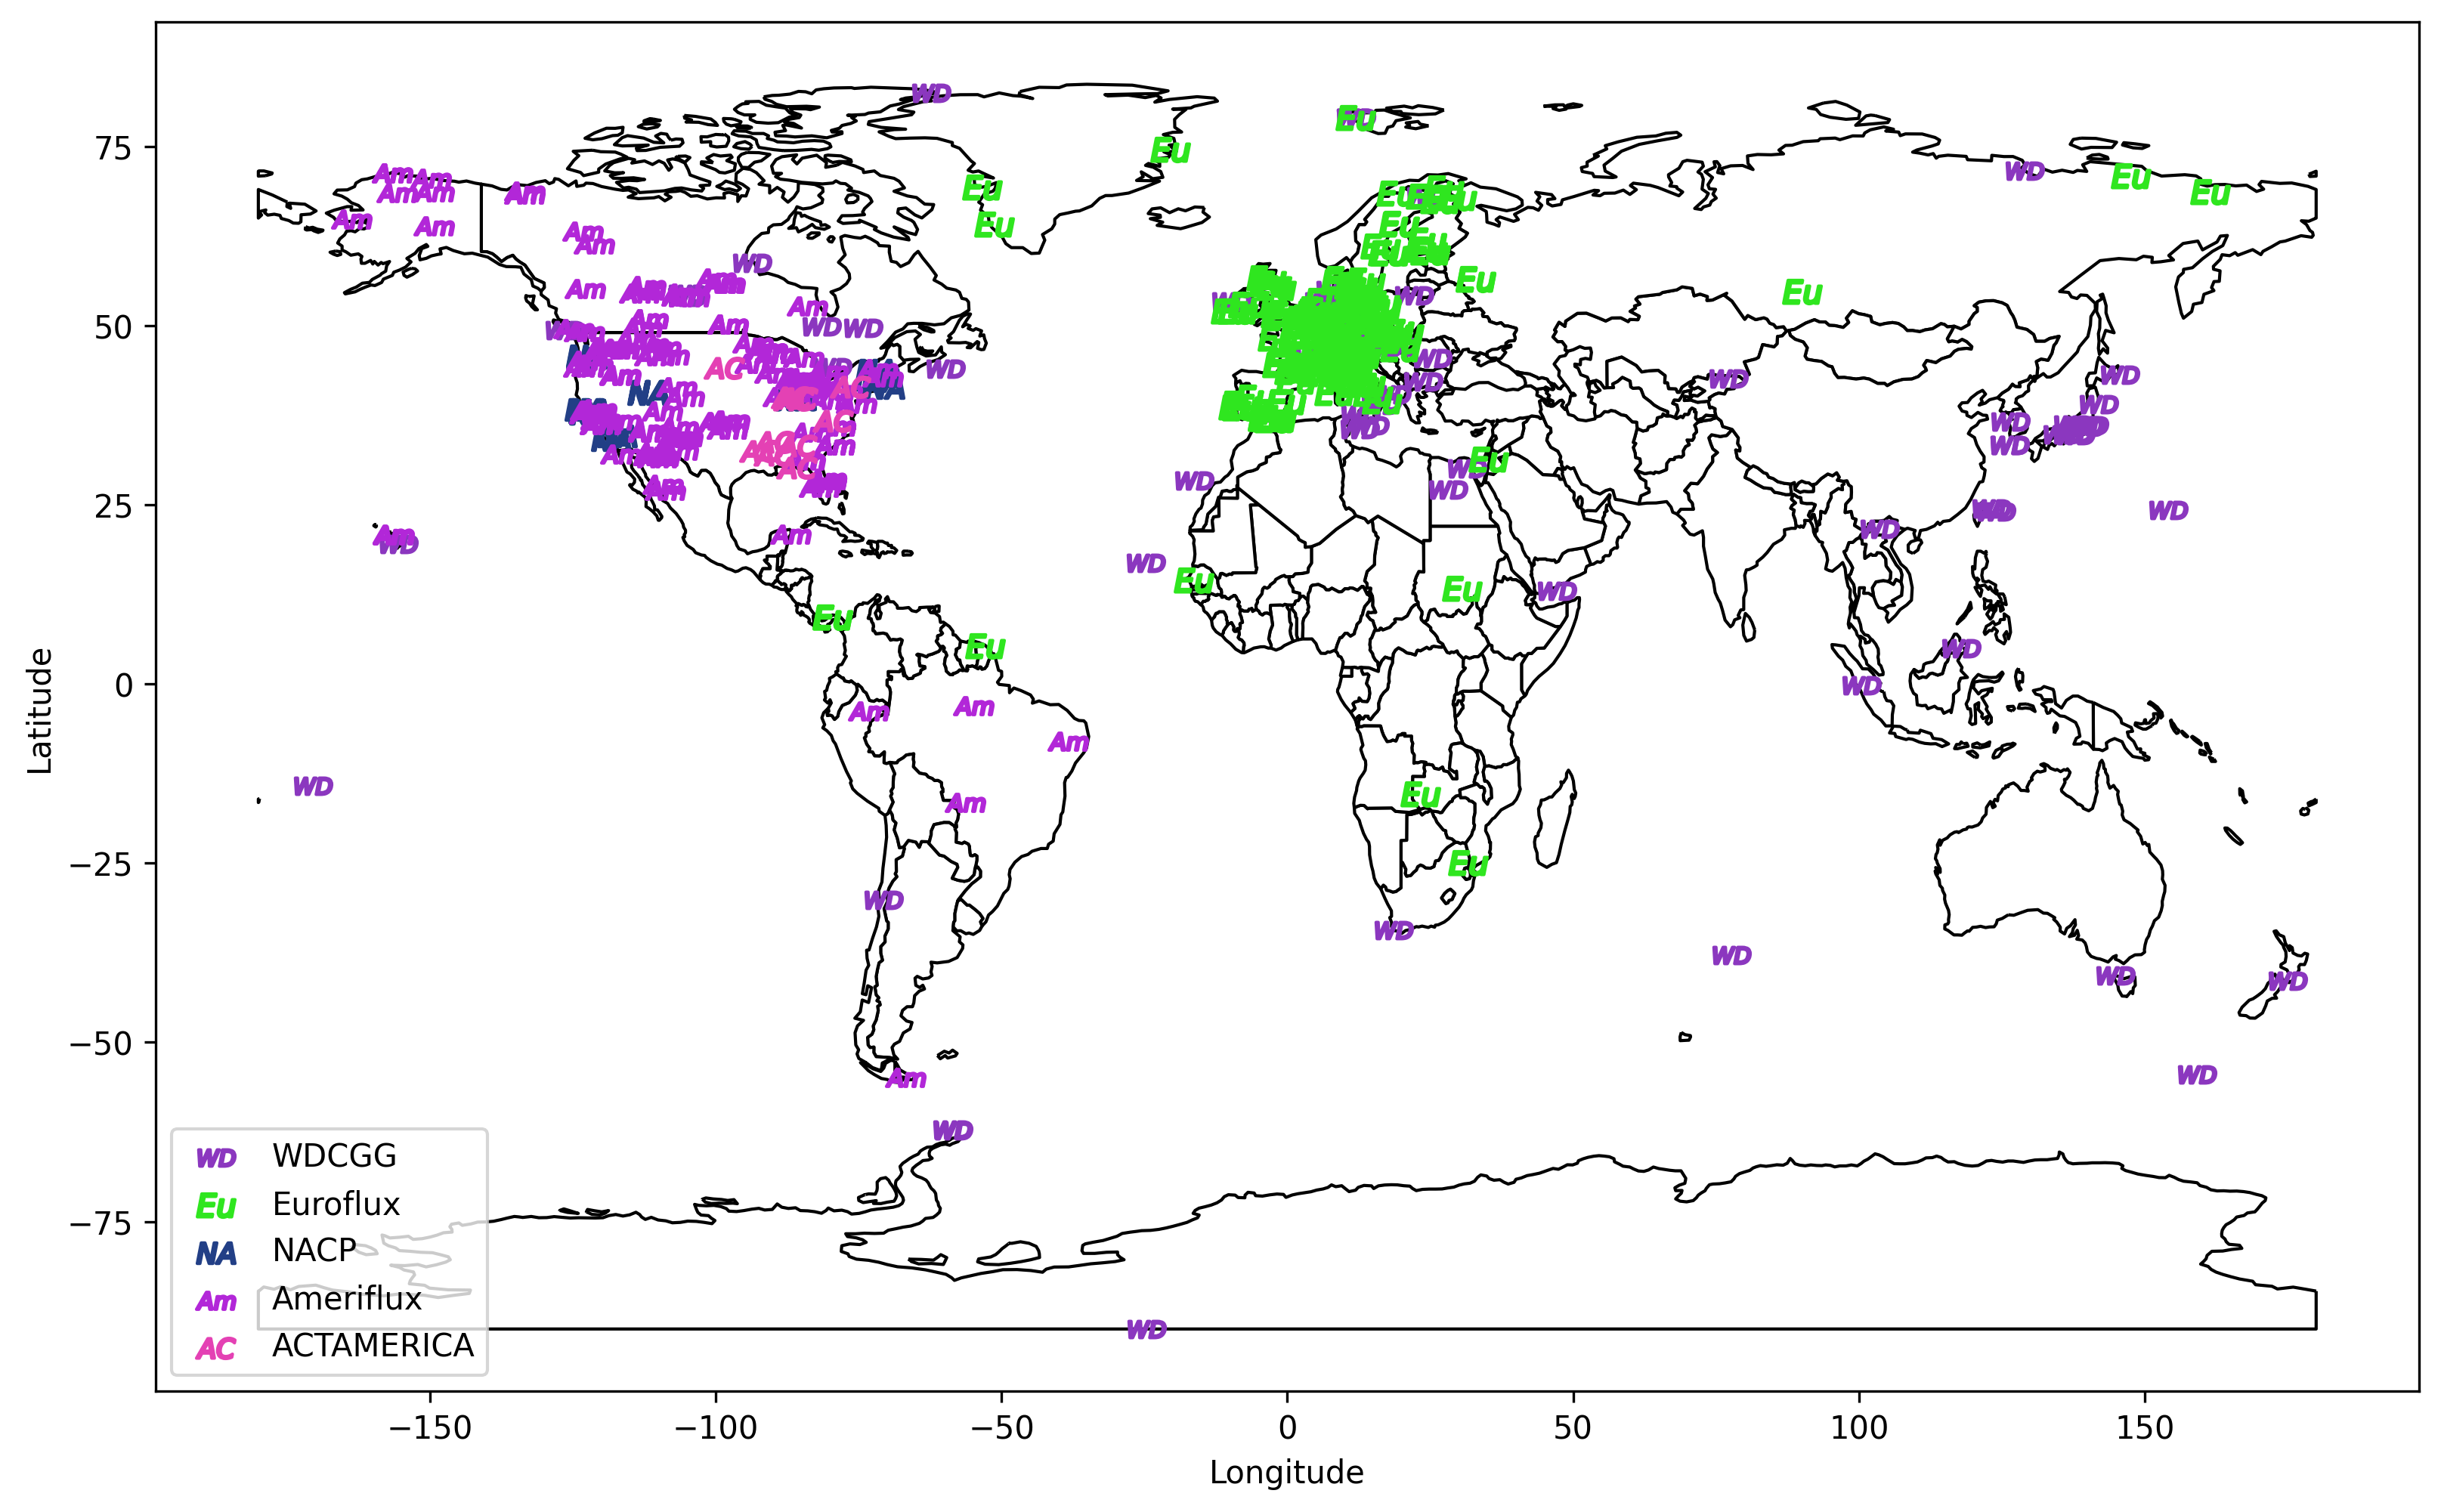

In [43]:
# Generate random lost of colors andto_stringot CO2 station data
import random

colors = []
for i in range(100):
    r = lambda: random.randint(0,255)
    colors.append('#%02X%02X%02X' % (r(),r(),r()))

fig = plt.figure(
    num=None,
    figsize=(32,8),
    dpi=300,
    facecolor='w',
    edgecolor='k'
)

ax = fig.add_subplot(111)

unic_stations = calc_unic_stations(sensors_df)
unic_legend_names = list(set(unic_stations['SITE_ID_sourse'].values))
all_sourses_dfs = [unic_stations.loc[unic_stations['SITE_ID_sourse'] == x, :] for x in unic_legend_names]

sensors_dfs = []
for df in all_sourses_dfs:
    sensor_gdf = gpd.GeoDataFrame(
        df, 
        geometry = gpd.points_from_xy(df.LOCATION_LONG, df.LOCATION_LAT)
    )
    sensor_gdf.crs = 'EPSG:4979'
    sensor_gdf = sensor_gdf.to_crs('EPSG:4326')
    sensors_dfs.append(sensor_gdf)

path = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(path)
base = gdf.plot(ax=ax, color='white', edgecolor='black')

legend = []
for i in range(len(unic_legend_names)):
    legend.append(unic_legend_names[i])
    sdf = sensors_dfs[i]
    sdf.plot(ax=base, marker='${}$'.format(unic_legend_names[i][:2]), color=colors[i], markersize=150);
    
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(legend)

plt.show()

In [18]:
# Define widjets 
long_w = widgets.FloatText(
    value=-66.7335,
    description='Longitude:',
    disabled=False
)
lat_w = widgets.FloatText(
    value=-54.9733,
    description='Latitude:',
    disabled=False
)

b_calc = widgets.Button(
    description='Calculate Climate',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='on Koeppen notion',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

c_pick = widgets.ColorPicker(
    concise=False,
    description='Pick a color',
    value='blue',
    disabled=False
)

b_save = widgets.Button(
    description='Save Data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='save DataFrame with nearest climate data and image',
    icon='check' # (FontAwesome names without the `fa-` prefix)
)

output = widgets.Output()


In [19]:
def calculate_nearest_co2(lat, long, data_df, step=0.1):
    data_mask = ((data_df['LOCATION_LAT'] - lat).apply(np.abs) <= step) & ((data_df['LOCATION_LONG'] - long).apply(np.abs) <= step)
    select_df = data_df.loc[data_mask, :]
    return select_df
    
    
def save_df(df, data_folder, name):
    """
    Save DataFrame and print data types for load
    """
    filename = os.path.join(data_folder, name)
    print('Save df as: ', filename)
    # Save csv
    df.to_csv(filename)
    print('Data types: \n', df.dtypes)
    


def plot_single_geolocation(df, hex_data_color, ax, crop_x=None, crop_y=None):
    """
    Plot geolocation for user latitude and longitude
    """
    sensor_gdf = gpd.GeoDataFrame(
        df, 
        geometry = gpd.points_from_xy(df.LOCATION_LONG, df.LOCATION_LAT)
    )
    sensor_gdf.crs = 'EPSG:4979'
    sensor_gdf = sensor_gdf.to_crs('EPSG:4326')
    
    # path = gpd.datasets.get_path('naturalearth_lowres')
    # gdf = gpd.read_file(path)
    
    world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
    world.plot(ax=ax, color='white', edgecolor='black', legend=True)

    legend = [climate_shifr_h[df['SITE_ID'].values[0]]]
    gdf.plot(ax, marker='${}$'.format(df['SITE_ID'].values[0]), color=hex_data_color, markersize=150);
    if crop_x:
        ax.set_xlim(crop_x[0], crop_x[1])
    if crop_y:
        ax.set_ylim(crop_y[0], crop_y[1])
    ax.legend(legend)
    return ax

In [20]:
from mpl_toolkits.basemap import Basemap
from IPython.display import display, FileLink, HTML
import base64

figure = None
select_df = None
long_value = None
lat_value = None

display(
    widgets.VBox([
        widgets.HBox([widgets.Label(value="Select coordinates: "), long_w, lat_w, c_pick, b_calc]),
        output,
        b_save
    ])
)


def create_download_link(filename, title = "Click here to download: "):  
    data = open(filename, "rb").read()
    b64 = base64.b64encode(data)
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title+f' {filename}',filename=filename)
    return HTML(html)


def on_calc_clicked(b):
    global figure, select_df, long_value, lat_value
    if b.description == 'Save Data':
        with output:
            if long_value:
                save_df(select_df, '/ExternalData/4TDataHDD3/data_lab/data_science/present_my_code/climate_data/', 'lat{0}_long{1}_co2_dm_cop_lc.csv'.format(lat_value, long_value))
                local_file = FileLink(
                    '/ExternalData/4TDataHDD3/data_lab/data_science/present_my_code/climate_data/lat{0}_long{1}_co2_dm_cop_lc.csv'.format(lat_value, long_value), 
                    result_html_prefix="Click here to download: "
                )
                display(create_download_link('./lat{0}_long{1}_co2_dm_cop_lc.csv'.format(lat_value, long_value)))
    else:
        with output:
            output.clear_output()
            # Calculate nearest df and climate zone
            long_value = long_w.value
            lat_value = lat_w.value
            koeppen_calc = clim_koppen_calc(lat_value, long_value, koppen)
            print('Climate according to Koeppen notion: {0} ({1})'.format(
                koeppen_calc,
                climate_shifr_h[koeppen_calc]
            ))
            select_df = calculate_nearest_co2(lat_value, long_value, sensors_df)
            print('Selected climate data with shape {0}'.format(select_df.shape))

            fig = plt.figure(
                facecolor=(1, 1, 1), 
                num=None, 
                figsize=(12, 8),
                dpi=300
            )
            m = Basemap(
                projection='mill',
                llcrnrlat=-80,
                urcrnrlat=80,
                llcrnrlon=-180,
                urcrnrlon=180,
                resolution='c',
                epsg='4326'
            )
            m.drawcoastlines()
            m.drawcountries()
            m.drawparallels(np.arange(-90.,91.,30.), labels=[True,True,False,False], dashes=[2,2])
            m.drawmeridians(np.arange(-180.,181.,60.), labels=[False,False,False,True], dashes=[2,2])
            
            x,y = m(long_value, lat_value)
            plt.scatter(x, y, marker='o', c=c_pick.value, s=10, label=climate_shifr_h[koeppen_calc])
            plt.text(x, y, koeppen_calc, color=c_pick.value, fontsize=10)
            plt.xlabel('Longitude', labelpad=32)
            plt.ylabel('Latitude', labelpad=32)
            plt.legend()
            plt.show()
            figure = fig
            
b_calc.on_click(on_calc_clicked)
b_save.on_click(on_calc_clicked)   